In [2]:
# wczytanie danych
import pandas as pd
df = pd.read_csv('Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# przygotowanie danych
pd.DataFrame(df.isnull().sum()).T

,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,0,0,0,0


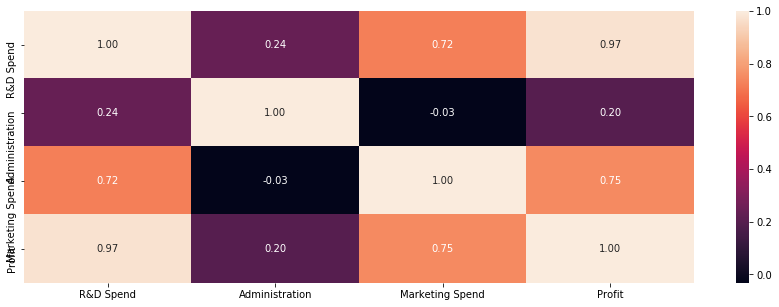

In [17]:
# Corelation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.autoscale(enable=True)
plt.show()


In [15]:
# Transformacja danych ze State One Hot Encode
dummies = pd.get_dummies(df.State)
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [18]:
# Dodawanie danych z dummies
df = pd.concat([df, dummies], axis='columns')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [19]:
# Usunięcie kolumny State i New York z powodu uniknięcia dummy variable trap
df.drop(columns=["State", "New York"], inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [20]:
# podział na dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_startups = df[["R&D Spend","Administration","Marketing Spend","California","Florida"]].values
y_startups = df[["Profit"]].values
X_train, X_test, y_train, y_test = train_test_split(X_startups, y_startups, random_state=1)

In [29]:
# przygotowanie modelu
from sklearn.linear_model import LinearRegression
regr = LinearRegression(normalize=True)  # modele liniowe(regresje liniowe,KNN, sieci neuronowe itd..) trzeba normalizować

In [30]:
# trenowanie modelu
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [31]:
# predykcja na danych testowych
y_pred = regr.predict(X_test)

In [32]:
# wynik
from sklearn.metrics import mean_squared_error
print("Współczynnik: ", regr.coef_)
print("Wyraz wspólny: ", regr.intercept_)
print("Błąd średniokwadratowy: %.2f" % mean_squared_error(y_test, y_pred))
print("Współczynnik determinacji R^2: %.2f" % regr.score(X_train, y_train) )

Współczynnik:  [[ 7.61639095e-01 -1.13592334e-03  3.35038917e-02 -8.49007841e+02
  -5.83502287e+02]]
Wyraz wspólny:  [49654.85039051]
Błąd średniokwadratowy: 68771246.80
Współczynnik determinacji R^2: 0.94


In [33]:
regr_score = regr.score(X_train, y_train)
regr_score

0.9419546147365754

In [34]:
df_test = pd.DataFrame()
df_test["prediction"] = y_pred.squeeze()
df_test["real"] = y_test.squeeze()

Text(0, 0.5, 'Value')

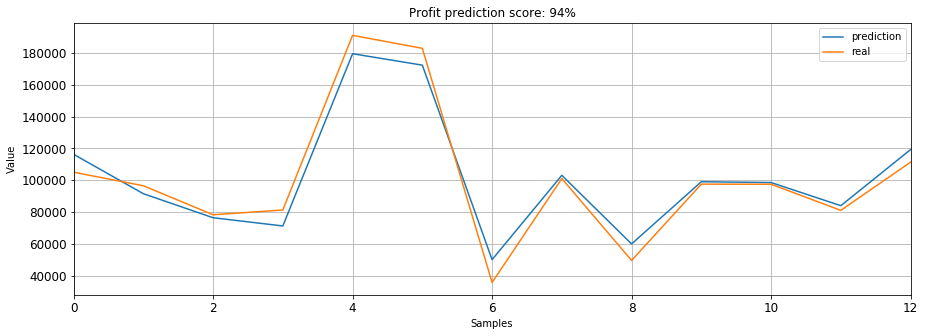

In [36]:
profit_ax = df_test.plot(figsize=(15,5), grid=True, legend=True, title=f"Profit prediction score: {str(regr_score)[2:4]}%", fontsize=12)
profit_ax.set_xlabel("Samples")
profit_ax.set_ylabel("Value")